# Loan Predict
First of all we will import all the necessary libraries

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [71]:
data=pd.read_csv('C:\\Users\\DELL\\OneDrive\\Desktop\\code clause internship\\Loan_Data.csv')

In [72]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [74]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [75]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [76]:
data.shape

(614, 13)

# Data Preprocessing

In [77]:
data1=data.dropna()

In [78]:
data1.shape

(480, 13)

In [79]:
data1.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Data Visualization

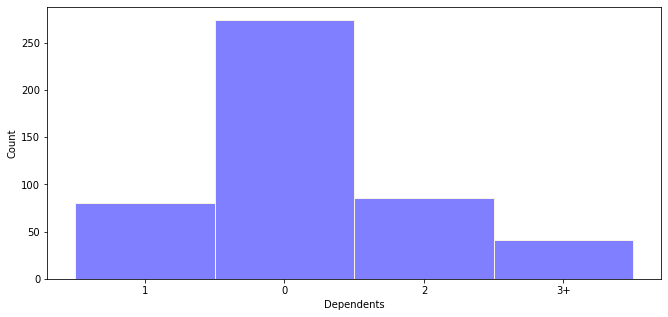

In [80]:
plt.figure(figsize=(11,5))
sns.histplot(data=data1, x='Dependents',color='blue',edgecolor='linen',alpha=0.5)
plt.xlabel('Dependents')
plt.ylabel('Count')
plt.show()

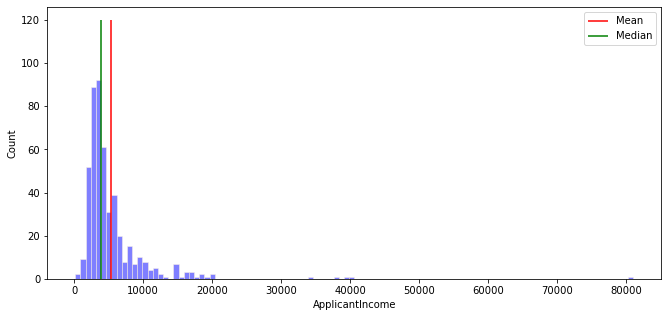

In [81]:
plt.figure(figsize=(11,5))
sns.histplot(data=data1, x='ApplicantIncome',color='blue',edgecolor='linen',alpha=0.5)
plt.xlabel('ApplicantIncome')
plt.ylabel('Count')
plt.vlines(data['ApplicantIncome'].mean(),ymin=0,ymax=120,color='red',label='Mean')
plt.vlines(data['ApplicantIncome'].median(),ymin=0,ymax=120,color='green',label='Median')
plt.legend()
plt.show()

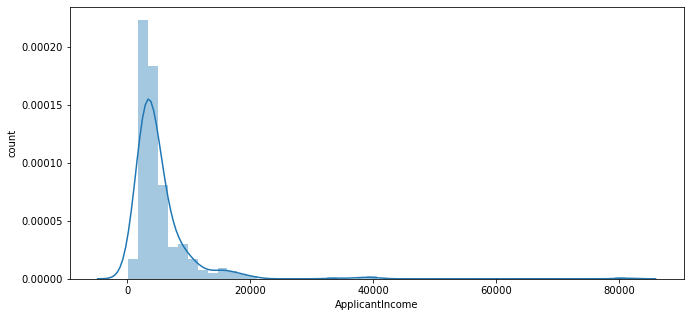

In [82]:
plt.figure(figsize=(11,5))
sns.distplot(data1['ApplicantIncome'])
plt.xlabel('ApplicantIncome')
plt.ylabel('count')
plt.show()

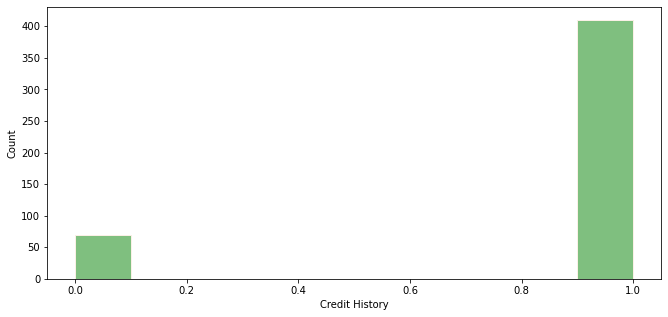

In [83]:
plt.figure(figsize=(11,5))
sns.histplot(data=data1,x='Credit_History',color='green',edgecolor='linen',alpha=0.5)
plt.xlabel('Credit History')
plt.ylabel('Count')
plt.show()

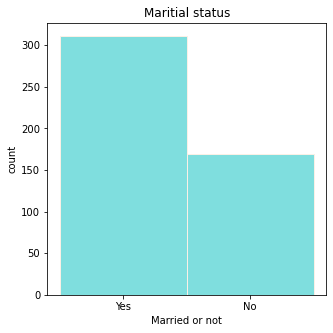

In [84]:
plt.figure(figsize=(5,5))
sns.histplot(data=data1, x='Married',color='c',edgecolor='linen',alpha=0.5)
plt.title('Maritial status')
plt.xlabel('Married or not')
plt.ylabel('count')
plt.show()

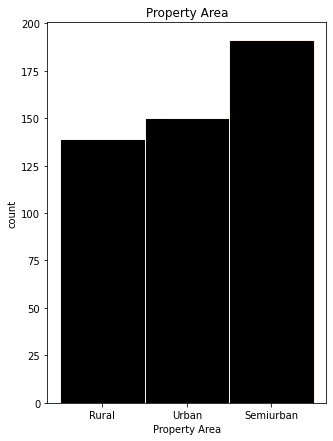

In [85]:
plt.figure(figsize=(5,7))
sns.histplot(data1,x='Property_Area',color='k',edgecolor='linen',alpha=1)
plt.title('Property Area')
plt.xlabel('Property Area')
plt.ylabel('count')
plt.show()

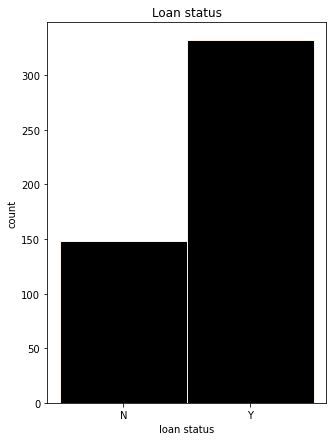

In [86]:
plt.figure(figsize=(5,7))
sns.histplot(data1,x='Loan_Status',color='k',edgecolor='linen',alpha=1)
plt.title('Loan status')
plt.xlabel('loan status')
plt.ylabel('count')
plt.show()

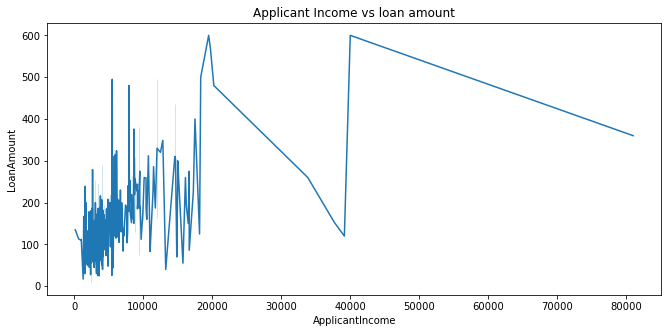

In [87]:
plt.figure(figsize=(11,5))
sns.lineplot(x='ApplicantIncome',y='LoanAmount',data=data1)
plt.title('Applicant Income vs loan amount')
plt.show()

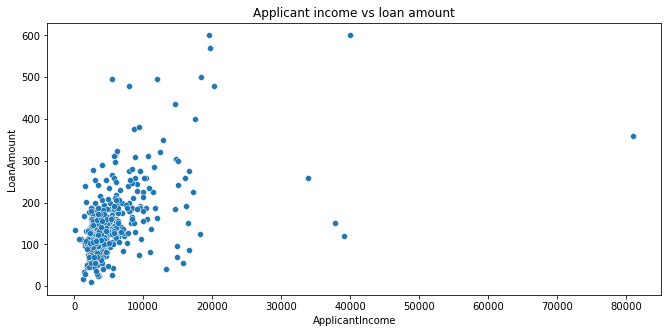

In [88]:
plt.figure(figsize=(11,5))
sns.scatterplot(x='ApplicantIncome',y='LoanAmount',data=data1)
plt.title('Applicant income vs loan amount')
plt.show()

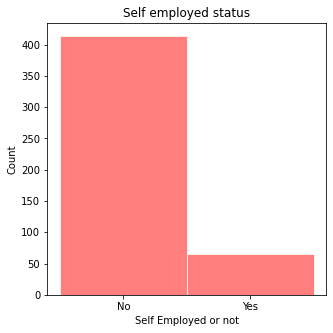

In [89]:
plt.figure(figsize=(5,5))
sns.histplot(data1,x='Self_Employed',color='r',edgecolor='linen',alpha=0.5)
plt.title('Self employed status')
plt.xlabel('Self Employed or not')
plt.ylabel('Count')
plt.show()

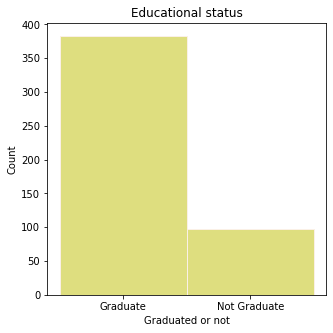

In [90]:
plt.figure(figsize=(5,5))
sns.histplot(data1,x='Education',color='y',edgecolor='linen',alpha=0.5)
plt.title('Educational status')
plt.xlabel('Graduated or not')
plt.ylabel('Count')
plt.show()

# Splitting Dataset Into Train and Test Data

In [91]:

train=data1[0:315]
train.drop('Loan_ID',axis=1,inplace=True)
train.tail()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
400,Male,Yes,2,Not Graduate,No,2889,0.0,45.0,180.0,0.0,Urban,N
401,Male,No,0,Not Graduate,No,2755,0.0,65.0,300.0,1.0,Rural,N
402,Male,No,0,Graduate,No,2500,20000.0,103.0,360.0,1.0,Semiurban,Y
403,Female,No,0,Not Graduate,No,1963,0.0,53.0,360.0,1.0,Semiurban,Y
404,Female,No,0,Graduate,Yes,7441,0.0,194.0,360.0,1.0,Rural,N


In [92]:

test=data1[315:]
test.drop('Loan_ID',axis=1,inplace=True)
test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
405,Female,No,0,Graduate,No,4547,0.0,115.0,360.0,1.0,Semiurban,Y
406,Male,Yes,0,Not Graduate,No,2167,2400.0,115.0,360.0,1.0,Urban,Y
407,Female,No,0,Not Graduate,No,2213,0.0,66.0,360.0,1.0,Rural,Y
408,Male,Yes,1,Graduate,No,8300,0.0,152.0,300.0,0.0,Semiurban,N
409,Male,Yes,3+,Graduate,No,81000,0.0,360.0,360.0,0.0,Rural,N


In [93]:
x_train=train.drop('Loan_Status',axis=1)
y_train=train['Loan_Status']

In [94]:
x_test=test.drop('Loan_Status',axis=1)
test['Loan_Status']

405    Y
406    Y
407    Y
408    N
409    N
      ..
609    Y
610    Y
611    Y
612    Y
613    N
Name: Loan_Status, Length: 165, dtype: object

In [95]:
true_p=test['Loan_Status']

In [96]:
x_train=pd.get_dummies(x_train)
x_test=pd.get_dummies(x_test)

In [97]:
x_train.fillna(0,inplace=True)
x_test.fillna(0,inplace=True)

# Logistic Regression


In [98]:
# Now using logistic regression
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()


In [99]:
# Model Training
log_reg.fit(x_train,y_train)

LogisticRegression()

In [100]:
prediction=log_reg.predict(x_test)


In [101]:
prediction

array(['Y', 'Y', 'N', 'N', 'N', 'N', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N'], dtype=object)

The output will be in the float so we have to multiply

In [102]:
#Accuracy Check
log_reg.score(x_test,true_p)

0.806060606060606

# Decision Tree

In [103]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()

In [104]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [105]:
dtc.predict(x_test)

array(['Y', 'Y', 'N', 'Y', 'N', 'N', 'N', 'N', 'N', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'N', 'Y', 'N',
       'Y', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'N', 'N', 'N', 'N', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'N', 'Y',
       'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'N',
       'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'Y',
       'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'N',
       'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'N', 'N', 'Y', 'Y', 'N', 'N', 'Y', 'N'], dtype=object)

The output is in the form of the float so by multiplying the value with 100 we will get our answer in the percentage

In [106]:
dtc.score(x_test,true_p)

0.7212121212121212

# Conclusion

Since, The model gives more accuracy with the help of the logistic regression so, It is better to prefer logistic Regression rather than the Decision Tree

In [107]:
submission = pd.DataFrame()
test=data1[315:]
submission['Loan_ID']=test['Loan_ID']
submission['Loan_Status'] = prediction
submission['Loan_Status'].replace(0,'no',inplace=True)
submission['Loan_Status'].replace(1,'yes',inplace=True)
submission.to_csv('C:\\Users\\DELL\\OneDrive\\Desktop\\code clause internship\\sub.csv', header=True, index=False)